In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importando os dados dos ativos da carteira de 2008 do Excel

In [31]:
file = "c:\\Users\\dan\\Desktop\\IC Complexos\\Minha base de dados\\Ativos Consolidados\\2008\\Ativos consolidade dados 2008 peso 2008.xlsx"
carteira = pd.read_excel(file, header=0)
carteira

,DATA,BBDC4,PETR3,CMIG4,AMBV4,RDCD3,TNLP4
0,2008-01-02,53.00,104.31,32.60,128.10,28.25,33.90
1,2008-01-03,51.91,102.80,32.90,130.81,28.02,33.69
2,2008-01-04,51.30,96.70,32.20,127.90,27.00,33.30
3,2008-01-07,52.25,93.38,32.39,128.10,25.75,35.70
4,2008-01-08,53.05,99.00,33.42,127.15,27.66,38.60
...,...,...,...,...,...,...,...
244,2008-12-22,23.65,26.12,30.70,100.20,25.50,34.12
245,2008-12-23,22.72,25.89,31.00,98.07,24.00,33.90
246,2008-12-26,22.21,26.85,30.80,98.50,24.79,33.55
247,2008-12-29,22.25,27.09,31.30,99.20,25.35,32.81


In [35]:
dic= {"BBDC4", "PETR3", "CMIG4", "AMBV4", "RDCD3", "TNLP4"}

retorno = pd.DataFrame(columns=dic)

for i in dic:
    retorno[i] = carteira[i].pct_change()
    
retorno 

,RDCD3,AMBV4,TNLP4,BBDC4,CMIG4,PETR3
0,NaN,NaN,NaN,NaN,NaN,NaN
1,-0.814159,2.115535,-0.619469,-2.056604,0.920245,-1.447608
2,-3.640257,-2.224601,-1.157614,-1.175111,-2.127660,-5.933852
3,-4.629630,0.156372,7.207207,1.851852,0.590062,-3.433299
4,7.417476,-0.741608,8.123249,1.531100,3.179994,6.018419
...,...,...,...,...,...,...
244,-3.041825,-1.860921,-4.559441,-3.665988,-0.647249,-6.346361
245,-5.882353,-2.125749,-0.644783,-3.932347,0.977199,-0.880551
246,3.291667,0.438462,-1.032448,-2.244718,-0.645161,3.707995
247,2.258975,0.710660,-2.205663,0.180099,1.623377,0.893855


In [59]:
retorno_medio=retorno.mean() 
retorno_medio

RDCD3    0.000467
AMBV4   -0.000478
TNLP4    0.000582
BBDC4   -0.002466
CMIG4    0.000353
PETR3   -0.003702
dtype: float64

In [60]:
cov = retorno.cov() 
cov

,RDCD3,AMBV4,TNLP4,BBDC4,CMIG4,PETR3
RDCD3,0.001711,0.000524,0.000743,0.001004,0.000590,0.000850
AMBV4,0.000524,0.000943,0.000620,0.000662,0.000456,0.000557
TNLP4,0.000743,0.000620,0.001619,0.000934,0.000582,0.000976
BBDC4,0.001004,0.000662,0.000934,0.001860,0.000762,0.001131
CMIG4,0.000590,0.000456,0.000582,0.000762,0.000919,0.000722
PETR3,0.000850,0.000557,0.000976,0.001131,0.000722,0.002809


In [61]:
#Número de ações

num_acoes = len(dic)
num_carteiras = 100000

#Listas 

lista_retornos = []
lista_volatilidade = []
lista_pesos = []

In [62]:
# Laço recursivo para preenchimento das listas

for i in range(num_carteiras):
    
    #soteando o uma listas de pesos do tamanho do num_acoes com o método np.random.random
    peso = np.random.random(num_acoes)
    
    #garantindo que a soma dos pesos será igual a uma unidade
    peso /= np.sum(peso)
    
    #acrescentando os pesos sorteados à lista de pesos com o método append
    lista_pesos.append(peso)
    
    #calculando o retorno esperado
    retorno_esperado = np.dot(peso, retorno_medio)
    
    #acrescentando o retorno_esperado a sua lista
    lista_retornos.append(retorno_esperado)
    
    #calculando na volatilidade 
    volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov, peso)))
    
    #acrescentando a volatilidade a lista
    lista_volatilidade.append(volatilidade)

In [63]:
#Dicionário do risco e retorno das carteiras

dic_carteiras = {'Retorno': lista_retornos, 'Volatilidade': lista_volatilidade}

In [56]:
#Criação do Dataframe portifolios para plotagem

portifolios = pd.DataFrame(dic_carteiras)
portifolios

,Retorno,Volatilidade
0,-0.001447,0.031866
1,-0.000922,0.032112
2,-0.001000,0.030788
3,-0.001193,0.032154
4,-0.000447,0.029826
...,...,...
99995,-0.001091,0.029907
99996,-0.001318,0.030842
99997,-0.000864,0.029380
99998,-0.001307,0.031220


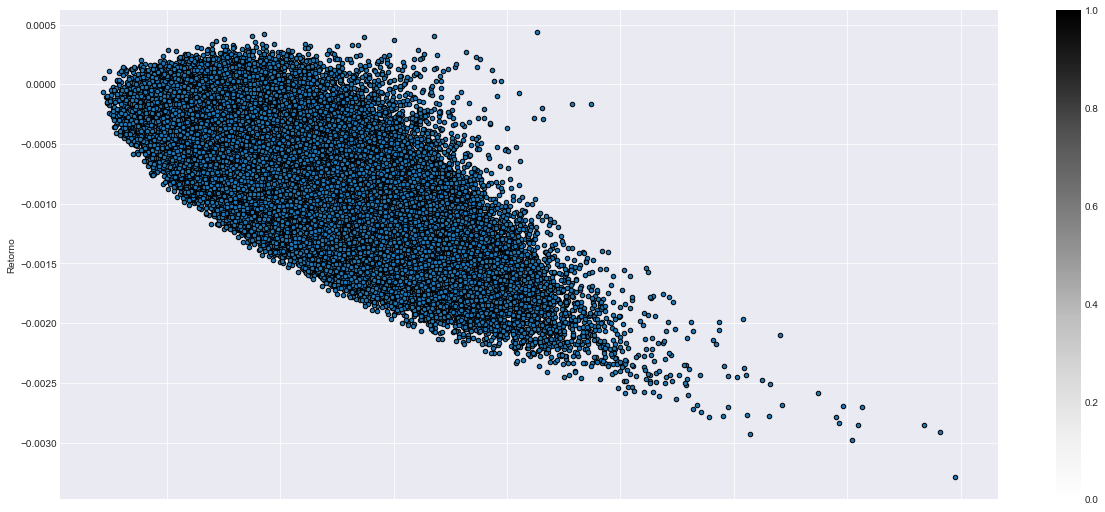

In [64]:
plt.style.use('seaborn-dark')
portifolios.plot.scatter(x='Volatilidade', y='Retorno', cmap='RdYlGn', edgecolors = 'black', figsize=(21,9), grid=True)

In [65]:
returns = np.array(lista_retornos)
risk = np.array(lista_volatilidade)

In [66]:
returnRisk = returns / risk

In [67]:
returnRisk.max()

0.013974087403092422

In [68]:
# A funçaõ argmax() retorna o indice do maior valor do array

index = returnRisk.argmax()

In [69]:
index

62039

In [73]:
lista_pesos[index] 

array([2.27590723e-01, 6.22613836e-02, 4.16767735e-01, 3.41010256e-04,
       2.91257224e-01, 1.78192440e-03])

In [123]:
retorno23 = np.dot(lista_pesos[index], retorno_medio)
retorno23 * 100

0.04143479025055124

## Tentando encontrar os pesos da tese na lista de pesos

In [76]:
pesos = pd.Series(lista_pesos)
pesos

0        [0.17706626096629025, 0.19093483198818018, 0.0...
1        [0.0345384255325518, 0.02213285708941692, 0.19...
2        [0.16479635241058052, 0.22463931693301528, 0.0...
3        [0.05805700756072862, 0.46848825792358456, 0.1...
4        [0.0683716252957344, 0.30143066010130964, 0.05...
                               ...                        
99995    [0.259497513304244, 0.1968564752643414, 0.2811...
99996    [0.039578156060229956, 0.3130151634408311, 0.2...
99997    [0.2109390648920215, 0.23365370219689144, 0.12...
99998    [0.05036174880280335, 0.11828813610310658, 0.1...
99999    [0.060301270159458686, 0.2628631538541237, 0.1...
Length: 100000, dtype: object

In [77]:
pesos_str = pesos.astype(str)

In [89]:
pesos_str.str.contains('0.2749')

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [113]:
pesos[pesos_str.str.contains('0.2749')]

1933     [0.2749511659977025, 0.02042700996519848, 0.10...
2415     [0.27493775650315205, 0.19476567363520386, 0.2...
2605     [0.09897065163392102, 0.2269312807289356, 0.07...
3027     [0.12626571682768872, 0.17329103338528917, 0.1...
4021     [0.1846971515992415, 0.2749930289622386, 0.009...
                               ...                        
98679    [0.03723116187725458, 0.3349526837457514, 0.08...
99052    [0.1105826521016537, 0.17516840236469253, 0.27...
99353    [0.0006773710060403906, 0.14994296310601118, 0...
99445    [0.1559158638733223, 0.2749427874748729, 0.031...
99954    [0.20208051940021934, 0.04212697016023061, 0.1...
Length: 168, dtype: object

In [114]:
pesos_procura=pd.Series(pesos[pesos_str.str.contains('0.2749')])

In [119]:
for i in pesos_procura.index:
    print(pesos_procura[i])

[0.27495117 0.02042701 0.10242154 0.15157273 0.06033551 0.39029204]
[0.27493776 0.19476567 0.21737507 0.00196841 0.06494679 0.2460063 ]
[0.09897065 0.22693128 0.07240704 0.27490472 0.18510331 0.14168299]
[0.12626572 0.17329103 0.19680211 0.03142731 0.16693893 0.3052749 ]
[0.18469715 0.27499303 0.00931842 0.21517496 0.14319918 0.17261726]
[0.09773805 0.24231907 0.05354664 0.27499342 0.24014209 0.09126073]
[0.12596866 0.27493926 0.00134731 0.21770806 0.11164269 0.26839402]
[0.04334173 0.22520206 0.02607104 0.19228034 0.27494556 0.23815927]
[0.05286953 0.27495    0.21963184 0.1125802  0.11998125 0.21998718]
[0.1736843  0.21316331 0.20417884 0.00092749 0.23136722 0.17667883]
[0.37718429 0.1313817  0.11435936 0.01081547 0.27493817 0.09132101]
[0.03411003 0.04274927 0.19928266 0.25231224 0.2261122  0.24543359]
[0.00931658 0.17138513 0.10846064 0.27499769 0.12165694 0.31418302]
[0.05990468 0.2749445  0.22320807 0.24295734 0.02954007 0.16944534]
[0.0967492  0.04002372 0.04704298 0.27498641 0.2